In [48]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
from catboost import CatBoostRegressor

from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import cross_val_score,KFold
from sklearn.feature_selection import RFE


In [49]:
titanic=pd.read_csv("modifiedtrain.csv") 
#titanic1=pd.read_csv("modified_features_train.csv") 

#Loading dataset from the csv file into "Pandas Dataframe"
titanic.head() 

def getNumber(str):
    if str=="S":
        return 1
    elif str=="Q":
        return 2
    else:
        return 3
titanic["embarked"]=titanic["Embarked"].apply(getNumber)
#We have created a new column called "gender" and 
#filling it with values 1 ,2 based on the values of sex column
titanic.head()
del titanic['Embarked']
#del titanic1['Embarked']

titanic.rename(columns={'embarked':'Embarked'}, inplace=True)
del titanic['AgeBand']
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
titanic=titanic[['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Sex', 'Age', 'FamilySize',  'IsAlone', 'Survived']]


# Create an object to transform the data to fit minmax processor
x_scaled = scaler.fit_transform(titanic['Fare'].reshape(-1,1))
#x_scaled = x_scaled.reshape(-1,1)
df_ = pd.DataFrame(x_scaled)

# Run the normalizer on the dataframe
titanic['Fare']=df_


titanic.head()
#titanic.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


,Pclass,SibSp,Parch,Fare,Embarked,Sex,Age,FamilySize,IsAlone,Survived
0,3,1,0,-0.500240,1,1,1.0,2,0,0
1,1,1,0,0.788947,3,2,2.0,2,0,1
2,3,0,0,-0.486650,1,2,1.0,1,1,1
3,1,1,0,0.422861,1,2,2.0,2,0,1
4,3,0,0,-0.484133,1,1,2.0,1,1,0


In [50]:
test=titanic.iloc[:, 9:]
train=titanic.iloc[:, :9]



from sklearn.model_selection import cross_val_score,StratifiedKFold,GridSearchCV

X_train,X_test,Y_train,Y_test=model_selection.train_test_split(train,test,test_size=0.10,random_state=0)


/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LR: 0.814931 (0.039950)
LDA: 0.796116 (0.047813)
KNN: 0.798631 (0.040227)
CART: 0.793974 (0.041906)
NB: 0.793427 (0.045651)


/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


SVM: 0.815009 (0.035921)
EXTRATREES: 0.792583 (0.039013)
ADABOOST: 0.809851 (0.040447)
GRADIENTBOOST: 0.812461 (0.043504)


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

XGBOOST: 0.817399 (0.053579)


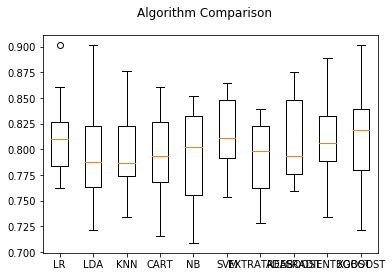

In [51]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('EXTRATREES', ExtraTreesClassifier()))
models.append(('ADABOOST', AdaBoostClassifier()))
models.append(('GRADIENTBOOST', GradientBoostingClassifier()))
models.append(('XGBOOST', xgb.XGBClassifier()))
#models.append(('KMNS', KMeans()))




results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=0)
	cv_results = model_selection.cross_val_score(model, X_train, np.ravel(Y_train), cv=10, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [52]:
#xzz=CatBoostRegressor(iterations=2,learning_rate=1,depth=2)
#xzz.fit(X_train, np.ravel(Y_train),plot=True)

In [63]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = [{'estimator__penalty': ['l1','l2'],'estimator__C':[0.7,0.8,0.9,1,1.2,1.3,1.4,1.5,2]}]
estimator = LogisticRegression()
#selector = RFECV(estimator, step=1, cv=10)
clf = GridSearchCV(estimator, param_grid, cv=10)
clf.fit(X_train, np.ravel(Y_train))
print(clf.best_estimator_.estimator_)
print(clf.best_estimator_.grid_scores_.mean())
print(clf.best_estimator_.ranking_)
clf.best_estimator_.n_features_

ValueError: Invalid parameter estimator for estimator LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.